<a href="https://colab.research.google.com/github/NAJOO0/2022F-Ajou-ML/blob/main/HW3_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **HW3 :: Parameter Tuning and Classifcation**

## 코랩과 구글 드라이브 연동 OR 로컬에서 파일 업로드
- 해당 섹션 코드 수정 가능

In [1]:
# 연동 OR 파일 업로드
# 연동 시 path 설정 주의

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 데이터 불러오기

In [3]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv('airline_sampled2.csv') 
# HW1에서 사용한 데이터를 샘플링한 파일이므로 꼭 제공된 csv 파일을 사용할 것

In [5]:
df.head()

,Unnamed: 0,Unnamed: 0.1,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,8827,8858,0,1,27,1,2,183,4,4,...,5,4,3,4,3,4,5,0,7.0,0
1,3588,3601,1,0,22,1,0,829,2,3,...,1,1,3,3,3,3,1,4,4.0,0
2,1011,1017,0,0,23,1,2,1020,4,5,...,4,3,4,5,3,5,4,0,0.0,1
3,7212,7237,1,0,21,1,0,1028,4,4,...,3,3,3,2,5,4,3,0,0.0,1
4,5025,5044,1,1,67,0,0,626,3,4,...,2,2,3,2,5,2,3,0,0.0,0


## 데이터 나누기

### **주의 사항**
train_test_split에 random seed를 사용하여 split set을 고정한다.
- 모든 문제에 같은 random seed를 부여할 필요는 없다.


In [6]:
from sklearn.model_selection import train_test_split

X = df.drop('satisfaction', axis=1)
y = df['satisfaction']
y=y.astype('int')
  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=1/9,random_state=1)

print("X_train's shape : ", X_train.shape)
print("y_train's shape : ", y_train.shape)
print("\nX_val's shape : ", X_val.shape)
print("y_val's shape : ", y_val.shape)
print("\nX_test's shape : ", X_test.shape)
print("y_test's shape : ", y_test.shape)

X_train's shape :  (800, 24)
y_train's shape :  (800,)

X_val's shape :  (100, 24)
y_val's shape :  (100,)

X_test's shape :  (100, 24)
y_test's shape :  (100,)


## 문제1 KNN



- Scikit-learn 라이브러리를 이용하여 KNN의 최적의 파라미터를 찾는다.
    - 최근접 이웃을 찾기 위한 거리의 종류로 최소한 두 가지 이상의 거리 척도를 사용한다.
    - K값을 최소 3개 이상 비교한다.
    - 거리 척도, k값에 따라 train, validation 정확도를 한 그래프로 그린다.(x축 k값, y축 정확도)
    - 찾은 최적의 파라미터와 test set 이용하여 test_accuracy 계산하고 기입한다.
    - 최적의 파라미터를 찾은 것에 대한 설명을 '텍스트 셀'에 작성한다.



In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

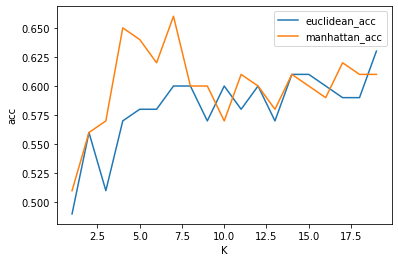

0.63 0.66
6 0.66
0.68


In [8]:
### 문제 1 ###
euclidean_acc =[] ## 거리 척도별로 결고 값을 저장
manhattan_acc =[]
k_range = range(1,20)
for i in k_range:
    knn_euclidean = KNeighborsClassifier(n_neighbors=i,weights="uniform",metric="euclidean") ##거리 척도 별로 classifier를 만듦
    knn_euclidean.fit(X_train,y_train);
    knn_manhattan = KNeighborsClassifier(n_neighbors=i,weights="uniform",metric="manhattan")
    knn_manhattan.fit(X_train,y_train)
    euclidean_acc.append(knn_euclidean.score(X_val,y_val))
    manhattan_acc.append(knn_manhattan.score(X_val,y_val))

plt.figure()
plt.plot(k_range,euclidean_acc,label="euclidean_acc")
plt.plot(k_range,manhattan_acc,label="manhattan_acc")
plt.legend()
plt.xlabel("K")
plt.ylabel("acc")
plt.show()

euclidean_max = max(euclidean_acc)
manhattan_max = max(manhattan_acc)
print(euclidean_max,manhattan_max)
if euclidean_max>manhattan_max:
    index_k = euclidean_acc.index(euclidean_max) 
    knn = KNeighborsClassifier(n_neighbors=index_k+1,weights="uniform",metric="euclidean")
    print(index_k,euclidean_acc[index_k])


else :
    index_k = manhattan_acc.index(manhattan_max) 
    knn = KNeighborsClassifier(n_neighbors=index_k+1,weights="uniform",metric="manhattan")
    print(index_k,manhattan_acc[index_k])

X_train_2 = pd.concat([X_train,X_val])
y_train_2 = pd.concat([y_train,y_val])
knn.fit(X_train_2,y_train_2)
print(knn.score(X_test,y_test))
### 코드 작성 ###

**설명 작성**  
- 최적의 파라미터:
- 설명:

---

## 문제2 Random Forest


- Scikit-learn 라이브러리를 이용하여 Random Forest의 최적의 파라미터를 찾는다.
    - Criterion 중 최소 두개를 비교한다.
    - 최적의 파라미터 max depth 값을 찾는다.
    - 파라미터에 따라 train, validation 정확도를 한 그래프로 그린다.(x축 max depth 값, y축 정확도)
    - 찾은 최적의 파라미터와 test set을 이용하여 test accuracy를 계산하고 기입한다.
    - 최적의 파라미터를 찾은 것에 대한 설명을 '텍스트 셀'에 작성한다.

In [9]:
from sklearn.ensemble import RandomForestClassifier

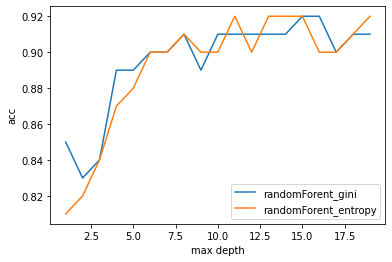

0.92 0.92
11 0.92
0.94


In [10]:
### 문제 2 ###
randomF_gini_acc = []
randomF_entropy_acc = []
depth_range=range(1,20)
for i in depth_range:
    randomF_gini = RandomForestClassifier(max_depth=i,criterion="gini")
    randomF_entropy = RandomForestClassifier(max_depth=i,criterion="entropy")
    randomF_gini.fit(X_train,y_train)
    randomF_entropy.fit(X_train,y_train)
    randomF_gini_acc.append(randomF_gini.score(X_val,y_val))
    randomF_entropy_acc.append(randomF_entropy.score(X_val,y_val))

plt.figure()
plt.plot(depth_range,randomF_gini_acc,label="randomForent_gini")
plt.plot(depth_range,randomF_entropy_acc,label="randomForent_entropy")
plt.legend()
plt.xlabel("max depth")
plt.ylabel("acc")
plt.show()

randomF_gini_max = max(randomF_gini_acc)
randomF_entropy_max = max(randomF_entropy_acc)
print(randomF_gini_max,randomF_entropy_max)

if randomF_gini_max > randomF_entropy_max :
    depth = randomF_gini_acc.index(randomF_gini_max) +1
    randomF = RandomForestClassifier(max_depth=depth,criterion="gini")
    print(depth,randomF_gini_acc[depth-1])
else:
    depth = randomF_entropy_acc.index(randomF_entropy_max) +1
    randomF = RandomForestClassifier(max_depth=depth,criterion="entropy")
    print(depth,randomF_entropy_acc[depth-1])

X_train_2 = pd.concat([X_train,X_val])
y_train_2 = pd.concat([y_train,y_val])
randomF.fit(X_train_2,y_train_2)
print(randomF.score(X_test,y_test))

### 코드 작성 ###

**설명 작성**  
- 최적의 파라미터:
- 설명:

---

## 문제3 Cross validation with Linear SVM
### 3-1: k-fold
- 수업시간에 배운 **5-fold** 를 이용하여 최적의 파라미터를 찾는다. (데이터는 동일)
- 수업시간에 배운 linear SVM 모델의 파라미터 C를 cross-validation을 바탕으로 최적화한다.
    - **5-fold CV를 할 때, test data를 제외한 90%의 데이터를 사용해야한다.**
    - 파라미터에 따라 K-fold CV를 통해 나온 평균 정확도와 각 fold의 정확도들을 한 그래프로 그린다.(x축 선택한 파라미터, y축 정확도)
    - 찾은 최적의 파라미터와 test set을 이용하여 test accuracy를 계산하고 기입한다.
    - 최적의 파라미터를 찾은 것에 대한 설명을 '텍스트 셀'에 작성한다.

### 3-2: Leave One Out
- 수업시간에 배운 Leave-One-Out 를 이용하여 최적의 파라미터를 찾는다. (데이터는 동일)
- 수업시간에 배운 linear SVM 모델의 파라미터 C를 cross-validation을 바탕으로 최적화한다.
  - **Leave-One-Out CV를 할 때, test data를 제외한 90%의 데이터를 사용해야한다.**
  - 파라미터에 따라 Leave-One-Out CV를 통해 나온 평균 정확도를 그래프로 그린다.(x축 선택한 파라미터, y축 정확도)
  - 찾은 최적의 파라미터와 test set을 이용하여 test accuracy를 계산하고 기입한다.
  - 최적의 파라미터를 찾은 것에 대한 설명을 '텍스트 셀'에 작성한다.

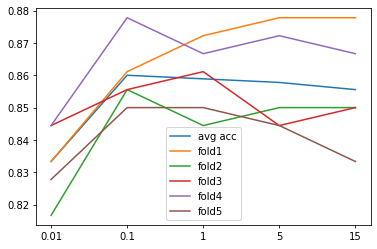

[0.8333333333333334, 0.86, 0.8588888888888888, 0.8577777777777778, 0.8555555555555555]
0.85
0.1


In [11]:
### 문제 3-1 ###
import sklearn.svm as svm
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.preprocessing import StandardScaler #0.85, 0.01, 0.84 0.1 83s
from sklearn.preprocessing import Normalizer    #쓰레기 
from sklearn.preprocessing import MinMaxScaler #0.85,0.1,0.85 56s
from sklearn.preprocessing import MaxAbsScaler #0.85, 5, 0.85, 0.1, 56s
from sklearn.preprocessing import RobustScaler #0.84, 1, 0.84 1 91s
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1,random_state=1)

C_acc = []

C_range_denote = [0.01,0.1,1,5,15]
C_range = [1,2,3,4,5]
plt.figure()
scores_fold1 = []
scores_fold2 = []
scores_fold3 = []
scores_fold4 = []
scores_fold5 = []
for c in C_range_denote:
    svm_clf =svm.SVC(kernel = 'linear', random_state=1,C=c)
    scores = cross_val_score(svm_clf, X_train, y_train, cv = 5)
    scores_fold1.append(scores[0])
    scores_fold2.append(scores[1])
    scores_fold3.append(scores[2])
    scores_fold4.append(scores[3])
    scores_fold5.append(scores[4])
    C_acc.append(scores.mean())

plt.plot(C_range,C_acc,label="avg acc")
plt.plot(C_range,scores_fold1,label="fold1")
plt.plot(C_range,scores_fold2,label="fold2")
plt.plot(C_range,scores_fold3,label="fold3")
plt.plot(C_range,scores_fold4,label="fold4")
plt.plot(C_range,scores_fold5,label="fold5")
plt.legend()
plt.xticks(C_range,labels=C_range_denote)
plt.tick_params(length=3)
plt.show()
print(C_acc)
optimal_C = C_range_denote[C_acc.index(max(C_acc))]
svm_clf =svm.SVC(kernel = 'linear', random_state=1,C=optimal_C)
svm_clf.fit(X_train,y_train)
print(svm_clf.score(X_test,y_test))
print(optimal_C)
### 코드 작성 ###

**설명 작성**  
- 최적의 파라미터:
- 설명:

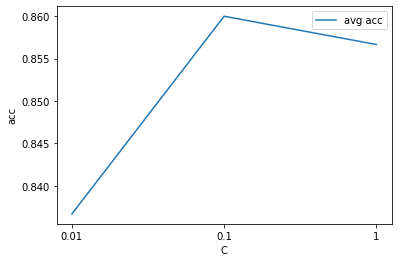

[0.8366666666666667, 0.86, 0.8566666666666667]
0.85
0.1


In [12]:
### 문제 3-2 ###
from sklearn.model_selection import LeaveOneOut
C_acc_loocv = []
loocv = LeaveOneOut()
C_range = [0.01,0.1,1]
plt.figure()
for c in C_range:
    svm_clf =svm.SVC(kernel = 'linear', random_state=1,C=c)
    scores = cross_val_score(svm_clf, X_train, y_train, cv = loocv)
    C_acc_loocv.append(scores.mean())

plt.plot([1,2,3],C_acc_loocv,label="avg acc")
plt.xticks([1,2,3],labels=C_range)
plt.legend()
plt.xlabel("C")
plt.ylabel("acc")
plt.show()
print(C_acc_loocv)
optimal_C = C_range[C_acc_loocv.index(max(C_acc_loocv))]
svm_clf =svm.SVC(kernel = 'linear', random_state=1,C=optimal_C)
svm_clf.fit(X_train,y_train)
print(svm_clf.score(X_test,y_test))
print(optimal_C)
### 코드 작성 ###

In [13]:
print(optimal_C)
svm1 = svm.SVC(kernel='linear',C=0.1)
svm2 = svm.SVC(kernel='linear',C=0.01)
svm3 = svm.SVC(kernel='linear',C=100)
svm4 = svm.SVC(kernel='linear',C=1)
svm1.fit(X_train,y_train)
print(svm1.score(X_test,y_test))
svm2.fit(X_train,y_train)
print(svm2.score(X_test,y_test))
svm3.fit(X_train,y_train)
print(svm3.score(X_test,y_test))
svm4.fit(X_train,y_train)
print(svm4.score(X_test,y_test))

0.1
0.85
0.85
0.85
0.84


**설명 작성**  
- 최적의 파라미터:
- 설명:

---

## 문제4 Regression
문제 4 에서는 캘리포니아 주택 가격 데이터셋을 사용합니다.   
학습을 통해 주택 가격을 예측하는 문제입니다.  
데이터에 대한 자세한 설명은 아래 코드의 description을 참고해주세요.

In [14]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [15]:
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['target'] = housing.target

In [16]:
print(df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  


In [17]:
print(df.shape) #(20640, 9)
print(df.describe())

(20640, 9)
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude        target  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308  

### 문제 4-1 : Adjusted R2 Score
- sklearn.metrics 패키지를 사용하여 ```def adjr2```에 Adjusted R2 Score를 구하는 함수를 작성한다.
- ```def r2```를 사용하여 ```adjr2```를 구현한다.
- 코드 작성 영역 이외의 코드를 수정하지 않는다.
- 주어진 함수 파라미터를 사용하여 구현한다.

In [18]:
from sklearn.metrics import r2_score

In [19]:
import numpy as np

def r2(actual, predicted):
    """ R2 Score """
    return r2_score(actual, predicted)

###################################
def adjr2(actual, predicted, rowcount, featurecount):
############ 문제 4-1 ##############
    """ Adjusted R2 Score """
    return(1-(1-r2(actual,predicted))*(rowcount-1)/(rowcount-featurecount-1))
####################################
####################################

### 문제 4-2 : Feature Selection
- sklearn 패키지를 사용하여 feature selection을 수행하는 함수 ```forward_selection```을 구현한다.
- Linear Regressor 을 사용하여 feature selection이 어떻게 달라지는 지 관찰한다.
- 코드 작성 영역 이외의 코드를 수정하지 않는다.
- 주어진 변수들, 자료들을 최대한 활용하여 코드를 작성한다.

In [20]:
from sklearn.linear_model import LinearRegression
import pandas as pd

In [21]:
X = df.drop(columns=['target'])
y = df['target']
y=y.astype('int')
print(X.shape)
print(y.shape)

(20640, 8)
(20640,)


In [22]:
len(X)

20640

In [23]:
def forward_selection(X, y): # X: train data, y: train data's target
    initial_list = []
    included = list(initial_list) # 포함되어야 하는 feature
    best_r2 = 0 # 가장 높은 r2 score를 저장

    while True:

        changed = False # while 문을 빠져나가는 조건으로 활용
        excluded = list(set(X.columns)-set(included)) # included list에 없는 column names 저장하는 리스트
        new_scores = dict.fromkeys(excluded)

        for new_column in excluded:
            
            model = LinearRegression()

            ###########################################
            ###### 코드 작성 영역 외 수정 하지 말 것 #########
            ################ 문제 4-2 ##################
            model.fit(X[new_column].values.reshape(-1,1),y)
            adjr2_score= adjr2(y,model.predict(X[new_column].values.reshape(-1,1)),len(X),1)
            if adjr2_score>best_r2:
                best_r2=adjr2_score
                included = new_column #가장 큰 r2값을 가지는 column을 저장
                changed = True
            new_scores[new_column]=adjr2_score
        if changed:
            break
        ##############################################
        ##############################################

    return included

selected_features = forward_selection(X, y)
print('selected_features:', selected_features)

selected_features: MedInc


### 문제 4-3: Regularized Model
- Scikit-learn 라이브러리를 사용하여 Ridge Regression과 Lasso Regression 모델을 만든다.
- train : validation : test **데이터셋의 비율을 8:1:1**로 설정한다.
- 문제 4-1의 **forward selection을 통해 얻은 feature만**을 가진 데이터를 사용한다.
- 다양한 alpha 값에 대해 validation dataset을 사용하여 각 모델에 대한 **최적의 alpha 값을 찾고 찾은 최적의 alpha 값을 텍스트 셀에 작성**한다.
- alpha 값은 아래의 리스트를 사용한다.  
```alpha = [0.0001, 0.001,0.01,0.1,1,10, 100, 1000, 10000, 100000]```
- alpha 값에 대한 R2 score의 변화를 그래프로 나타낸다.
  * **x축: alpha 값**
  * **y축: R2 score 값**
  * 파란색 선: Ridge 결과, 빨간색 선: Lasso 결과
  * 그래프에 **legend**가 포함되어 있어야 한다. 
- **train과 validation dataset을 합하여 train set을 만든 후 최종 학습 결과를 도출**한다.
  * 최적의 alpha 값을 찾을 때 사용한 test set은 변하지 않는다. 
  * r2 score를 사용하여 train set에 대한 prediction 결과와 test set에 대한 prediction 결과를 구해 print 한다.

In [24]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score
import numpy as np

In [25]:
y

0        4
1        3
2        3
3        3
4        3
        ..
20635    0
20636    0
20637    0
20638    0
20639    0
Name: target, Length: 20640, dtype: int64

In [47]:
### 문제 4-3 ###
alpha = [0.0001, 0.001,0.01,0.1,1,10, 100, 1000, 10000, 100000]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,random_state=50)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=1/9,random_state=50)
ridge_score=[]
lasso_score=[]
for a in alpha:
    rid = Ridge(alpha=a)
    rid.fit(X_train[selected_features].values.reshape(-1,1),y_train)
    adjr2_score= adjr2(y_val,rid.predict(X_val[selected_features].values.reshape(-1,1)),len(X_val),1)
    ridge_score.append(adjr2_score)
    lasso = Lasso(alpha=a)
    lasso.fit(X_train[selected_features].values.reshape(-1,1),y_train)
    adjr2_score= adjr2(y_val,lasso.predict(X_val[selected_features].values.reshape(-1,1)),len(X_val),1)
    lasso_score.append(adjr2_score)
ridge_optimal_alpha = alpha[ridge_score.index(max(ridge_score))]
lasso_optimal_alpha = alpha[lasso_score.index(max(lasso_score))]
print(ridge_optimal_alpha,lasso_optimal_alpha,selected_features)
### 코드 작성 ###

0.0001 0.0001 MedInc


In [50]:
ridge_score

[0.4823427519213408,
 0.4823427517059343,
 0.48234274955185874,
 0.48234272800996725,
 0.48234251247749327,
 0.48234034580068075,
 0.4823175476750112,
 0.48198018524456,
 0.47064794605221527,
 0.2896815891984611]

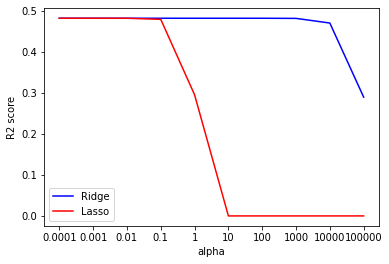

In [45]:
### 문제 4-3 ###
x=[1,2,3,4,5,6,7,8,9,10]
plt.figure()
plt.plot(x,ridge_score,label="Ridge",color="blue")
plt.plot(x,lasso_score,label="Lasso",color="red")
plt.xticks(x,labels=alpha)
plt.legend()
plt.xlabel("alpha")
plt.ylabel("R2 score")
plt.show()
### 그래프 작성 ###

- Rridge regression 모델 최적의 alpha 값: 0.0001
- Lasso regression 모델 최적의 alpha 값: 0.0001

In [58]:
# 최종 결과 출력
X_train_2 = pd.concat([X_train,X_val])
y_train_2 = pd.concat([y_train,y_val])
ridge = Ridge(alpha=ridge_optimal_alpha)
ridge.fit(X_train_2[selected_features].values.reshape(-1,1),y_train_2)
ridge_adjr2_score_train= adjr2(y_train_2,ridge.predict(X_train_2[selected_features].values.reshape(-1,1)),len(X_train_2),1)
ridge_adjr2_score_test= adjr2(y_test,ridge.predict(X_test[selected_features].values.reshape(-1,1)),len(X_test),1)
print(ridge_adjr2_score_test,ridge_adjr2_score_train)
lasso = Lasso(alpha=lasso_optimal_alpha)
lasso.fit(X_train_2[selected_features].values.reshape(-1,1),y_train_2)
lasso_adjr2_score_train= adjr2(y_train_2,lasso.predict(X_train_2[selected_features].values.reshape(-1,1)),len(X_train_2),1)
lasso_adjr2_score_test= adjr2(y_test,lasso.predict(X_test[selected_features].values.reshape(-1,1)),len(X_test),1)
print(lasso_adjr2_score_test,lasso_adjr2_score_train)

0.4415834837462561 0.45487854575897535
0.44158483194551146 0.45487854404484995
